Initial Dataset Sample:
  Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  In his second year of fighting crime, Batman u...    3827.658        1151   
2  Stranded at a rest stop in the mountains durin...    2618.087         122   
3  The tale of an extraordinary family, the Madri...    2402.201        5076   
4  As a collection of history's worst tyrants and...    1895.511        1793   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3  

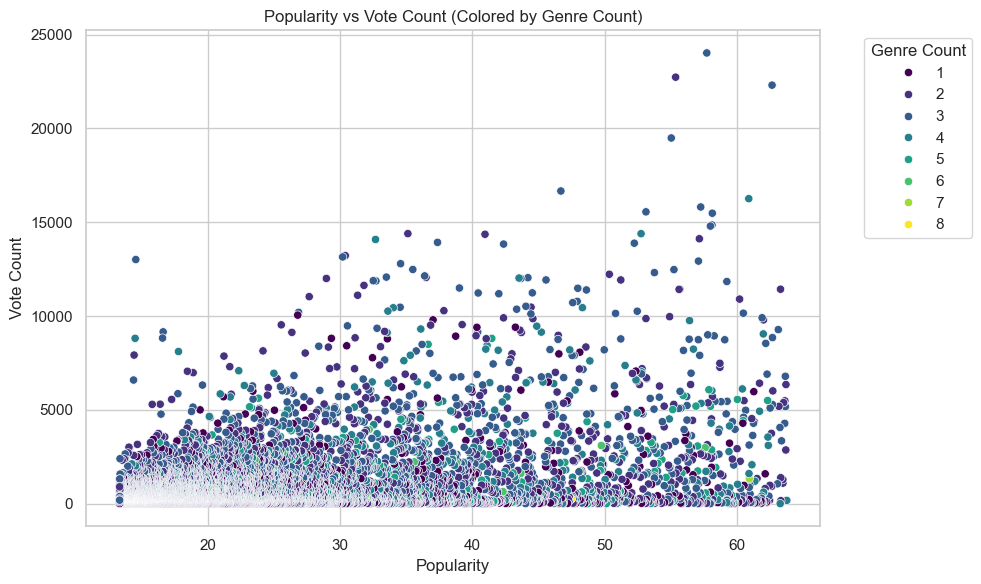

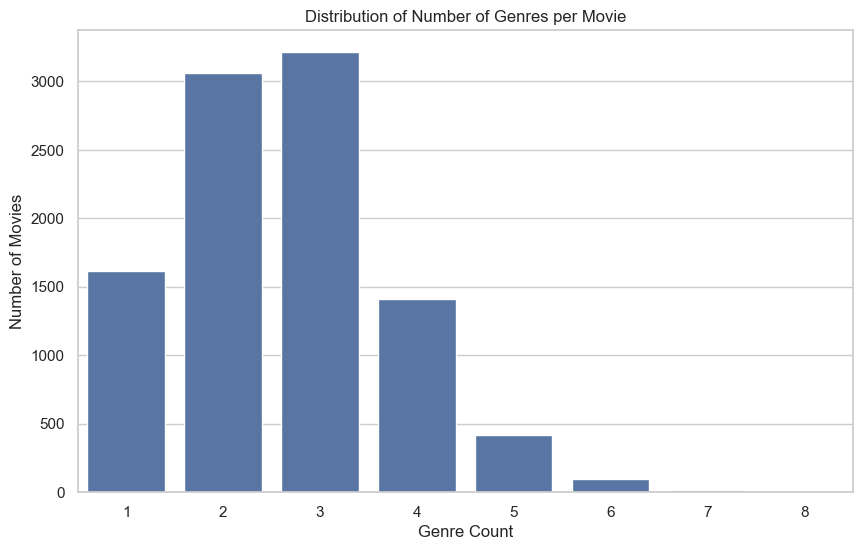

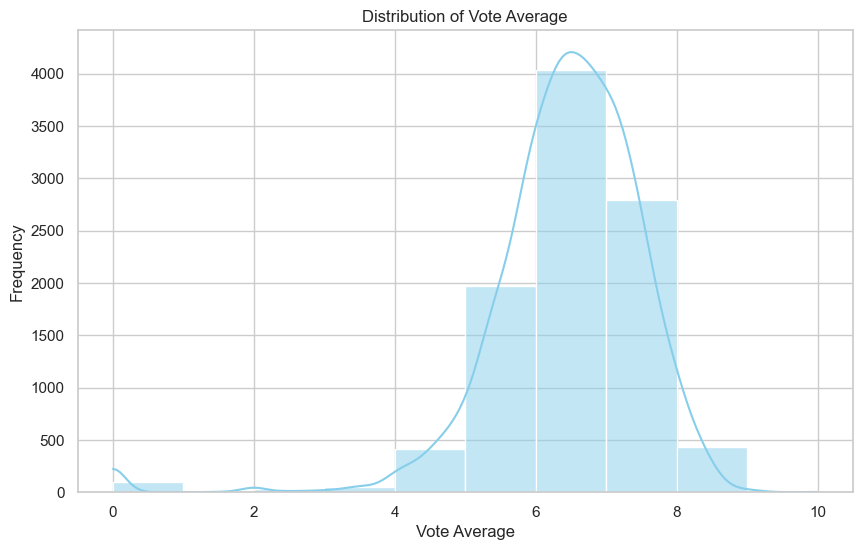

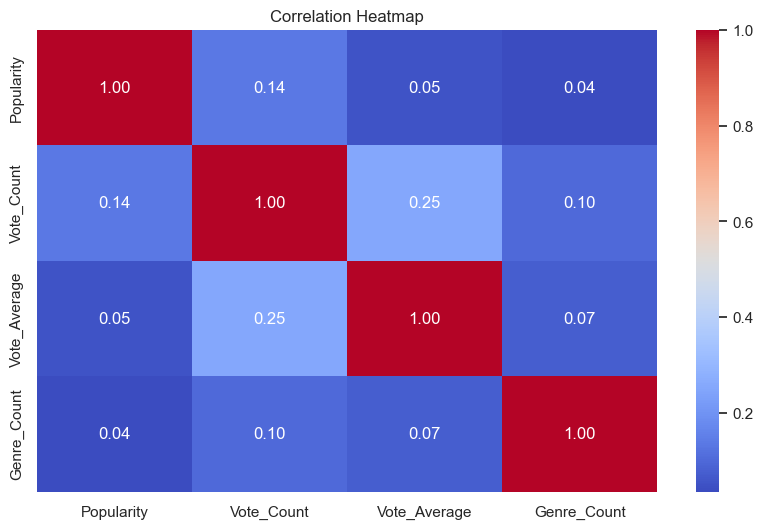

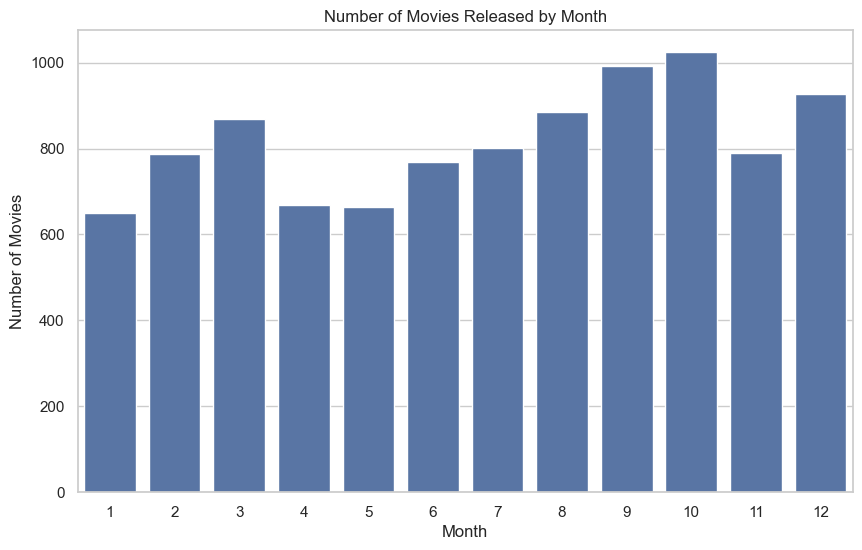

C:\Users\91995\AppData\Local\Temp\ipykernel_9128\378233953.py:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='muted')


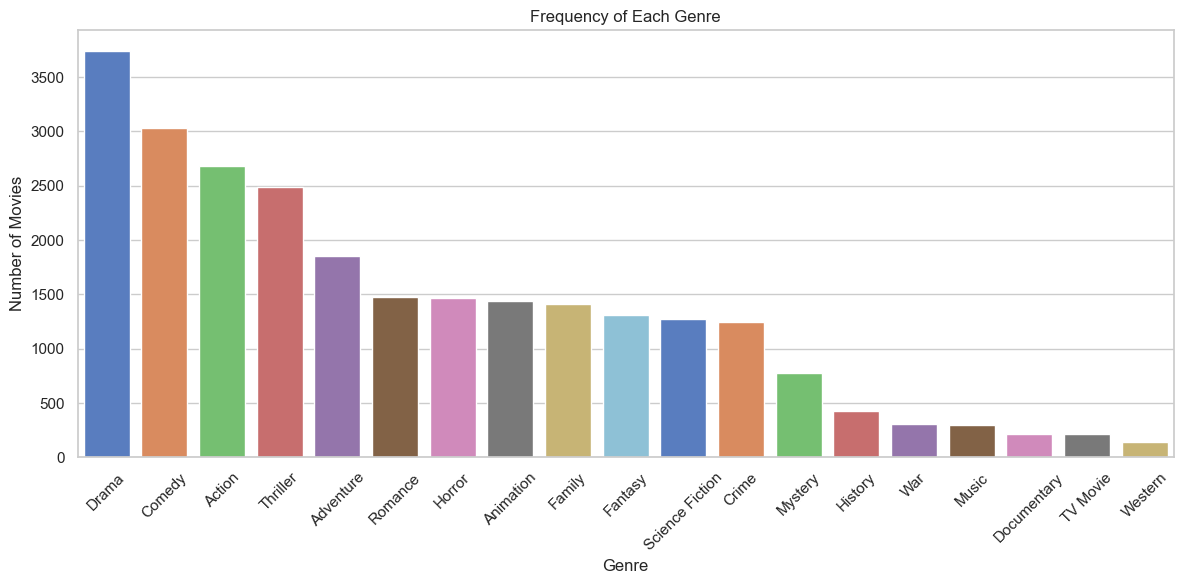

OSError: Cannot save file into a non-existent directory: 'data'

In [25]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Configure plot style and size
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
print("Initial Dataset Sample:")
print(df.head())

# -------------------------------
# 1. Data Cleaning & Handling Missing Values
# -------------------------------

# Check for missing values
print("\nMissing Values in Each Column:\n", df.isnull().sum())

# Convert 'Release_Date' to datetime, coerce errors to NaT
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Fill missing text columns with 'Not Available' where applicable
df['Overview'] = df['Overview'].fillna('Not Available')
df['Poster_Url'] = df['Poster_Url'].fillna('Not Available')

# Drop rows with missing release dates (if any)
missing_dates = df['Release_Date'].isnull().sum()
print(f"\nNumber of rows with missing Release_Date: {missing_dates}")
df.dropna(subset=['Release_Date'], inplace=True)

print(f"Dataset shape after cleaning missing Release_Date: {df.shape}")

# -------------------------------
# 2. Feature Engineering & Selection
# -------------------------------

# Extract Year and Month from Release_Date
df['Year'] = df['Release_Date'].dt.year
df['Month'] = df['Release_Date'].dt.month

# Count number of genres per movie (split by comma)
df['Genre_Count'] = df['Genre'].apply(lambda x: len(str(x).split(',')))

# Normalize 'Popularity' to 0-1 scale using MinMaxScaler
scaler = MinMaxScaler()
df['Popularity_Norm'] = scaler.fit_transform(df[['Popularity']])

print("\nFeature Engineering completed: Added Year, Month, Genre_Count, and normalized Popularity.")

# -------------------------------
# 3. Data Integrity & Consistency Checks
# -------------------------------

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows found: {duplicate_count}")

# Drop duplicates if any
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df.shape}")

# Ensure correct data types
df['Vote_Count'] = df['Vote_Count'].astype(int)
df['Vote_Average'] = df['Vote_Average'].astype(float)

print("\nData types after conversion:")
print(df.dtypes[['Vote_Count', 'Vote_Average']])

# -------------------------------
# 4. Summary Statistics & Insights
# -------------------------------

print("\nSummary Statistics for Numeric Columns:\n", df.describe())

# Additional stats for engineered features
print("\nSummary Statistics for Year, Month, Genre_Count:\n", df[['Year', 'Month', 'Genre_Count']].describe())

# Most voted movie
most_voted = df[df['Vote_Count'] == df['Vote_Count'].max()]
print("\nMost Voted Movie:")
print(most_voted[['Title', 'Vote_Count', 'Vote_Average']])
print(f"'{most_voted.iloc[0]['Title']}' has the highest number of votes ({most_voted.iloc[0]['Vote_Count']}) with an average rating of {most_voted.iloc[0]['Vote_Average']}.")

# -------------------------------
# 5. Outlier Detection & Handling (Popularity)
# -------------------------------

# Calculate IQR for popularity
Q1 = df['Popularity'].quantile(0.25)
Q3 = df['Popularity'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['Popularity'] >= lower_bound) & (df['Popularity'] <= upper_bound)]

print(f"\nOutlier detection using IQR on Popularity:")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(f"Number of outliers removed: {df.shape[0] - df_no_outliers.shape[0]}")

# Use df_no_outliers for visualization where relevant

# -------------------------------
# 6. Initial Visual Representations of Key Findings
# -------------------------------

import os
output_dir = 'outputs'
os.makedirs(output_dir, exist_ok=True)

# Popularity vs Vote Count Scatter Plot
plt.figure()
sns.scatterplot(data=df_no_outliers, x='Popularity', y='Vote_Count', hue='Genre_Count', palette='viridis', legend='full')
plt.title("Popularity vs Vote Count (Colored by Genre Count)")
plt.xlabel("Popularity")
plt.ylabel("Vote Count")
plt.legend(title='Genre Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'{output_dir}/popularity_vs_vote_count.png')
plt.show()

# Distribution of Number of Genres per Movie
plt.figure()
sns.countplot(data=df, x='Genre_Count')
plt.title("Distribution of Number of Genres per Movie")
plt.xlabel("Genre Count")
plt.ylabel("Number of Movies")
plt.savefig(f'{output_dir}/genre_count_distribution.png')
plt.show()

# Vote Average Distribution Histogram
plt.figure()
sns.histplot(df['Vote_Average'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Frequency")
plt.savefig(f'{output_dir}/vote_average_distribution.png')
plt.show()

# Correlation Heatmap for Numeric Features
plt.figure()
sns.heatmap(df[['Popularity', 'Vote_Count', 'Vote_Average', 'Genre_Count']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig(f'{output_dir}/correlation_heatmap.png')
plt.show()

# Number of Movies Released Each Month
plt.figure()
sns.countplot(data=df, x='Month', order=sorted(df['Month'].unique()))
plt.title("Number of Movies Released by Month")
plt.xlabel("Month")
plt.ylabel("Number of Movies")
plt.savefig(f'{output_dir}/movies_released_per_month.png')
plt.show()

# Additional: Frequency of Each Genre (Explode genre list)
all_genres = df['Genre'].str.split(',').explode().str.strip()
genre_counts = all_genres.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='muted')
plt.title("Frequency of Each Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{output_dir}/genre_frequency.png')
plt.show()



df.to_csv("data/mymoviedb_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'data/mymoviedb_cleaned.csv'")
